<a href="https://colab.research.google.com/github/ClementeGarcia/Simulaci-n-1/blob/main/Inventarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sistema de Inventarios

Se tiene una empresa cuya demanda mensual de un cierto producto, considerando la probabilidad empirica de que esta se de:

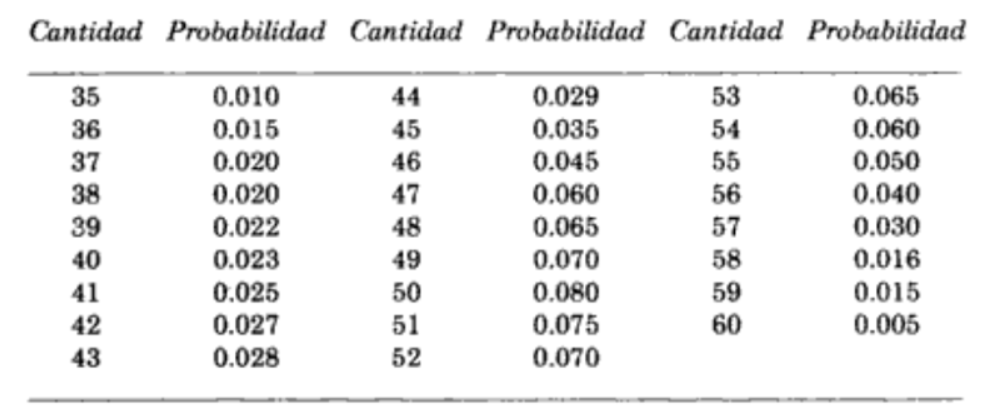

De este producto, se puede realizar un pedidio en caso de que se este por debajo de nivel de reorden, el tiempo que se tarda en entregar el producto, así como la probabilidad de que esta ocurra, con:

|Meses|1|2|3|
|-----|-|-|-|
|Probabilidad|0.30|0.40|0.30|

La venta del producto depende del mes en el que nos encontramos, llamados factores estacionales:

|Mes|Factores Estacionarios|Mes|Factores Estacionarios|
|----|----------------------|---|----------------------|
|1|1.20|7|0.80|
|2|1.00|8|0.90|
|3|0.90|9|1.00|
|4|0.80|10|1.20|
|5|0.80|11|1.30|
|6|0.70|12|1.40|

La información con respecto a costos esta dada por:

*   Costo de Ordenar = $100/orden

*   Costo de Inventario = $20/unidad

*   Costo faltante = $50/unidad


Cantidad a ordenar $q$ = 200 y el nivel de reorden $R$ = 100, se tiene un inventario de 150 unidades.

¿Cuál es la cantidad optima a ordenar y el nivel de rorden optimo?



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from tabulate import tabulate


In [2]:
costos = {
    'ordenar': 100,
    'mantener': 20,
    'faltante': 50
}

In [40]:
disdemanda = [50, 60, 70, 80, 90]
factoresEstacionales = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1]

In [4]:
# Parámetros del inventario
R = 100  # Nivel de reorden
q = 200  # Cantidad a ordenar


In [39]:
#Datos
inventarioini = 150
aleatorios = [0.74022, 0.65741, 0.66083, 0.08355, 0.55121, 0.00911, 0.14060, 0.14845, 0.41839, 0.39685, 0.74416, 0.53152]

In [10]:
# Función para ajustar la demanda
def ajustar_demanda(num_aleatorio, mes):
    demandaBase = np.interp(num_aleatorio, [0, 1], [50, 90])  # Ajusta según la distribución empírica
    demandaAjustada = demandaBase * factoresEstacionales[mes - 1]
    return round(demandaAjustada)

In [12]:
# Inicializar variables
meses = list(range(1, 13))
inventarios_iniciales = []
inventarios_finales = []
demandas_ajustadas = []
ordenes = []

inventario = inventarioini

In [13]:
for mes in range(1, 13):
    inventarios_iniciales.append(inventario)

    num_aleatorio = aleatorios[mes - 1]
    demanda_ajustada = ajustar_demanda(num_aleatorio, mes)
    demandas_ajustadas.append(demanda_ajustada)

    inventario_final = inventario - demanda_ajustada
    inventario_final = max(0, inventario_final)
    inventarios_finales.append(inventario_final)

    # Decidir si hacer un pedido
    if inventario_final <= R:
        orden = q
        inventario_final += q
    else:
        orden = 0

    ordenes.append(orden)

    inventario = inventario_final  # Actualizar el inventario para el próximo mes


In [41]:
# Crear DataFrame para graficar
df = pd.DataFrame({
    'Mes': meses,
    'Inventario Inicial': inventarios_iniciales,
    'Demanda Ajustada': demandas_ajustadas,
    'Inventario Final': inventarios_finales,
    'Ordenes': ordenes
})
df

,Mes,Inventario Inicial,Demanda Ajustada,Inventario Final,Ordenes
0,1,150,80,70,200
1,2,270,84,186,0
2,3,186,92,94,200
3,4,294,69,225,0
4,5,225,101,124,0
5,6,124,76,48,200
6,7,248,89,159,0
7,8,159,95,64,200
8,9,264,120,144,0
9,10,144,125,19,200


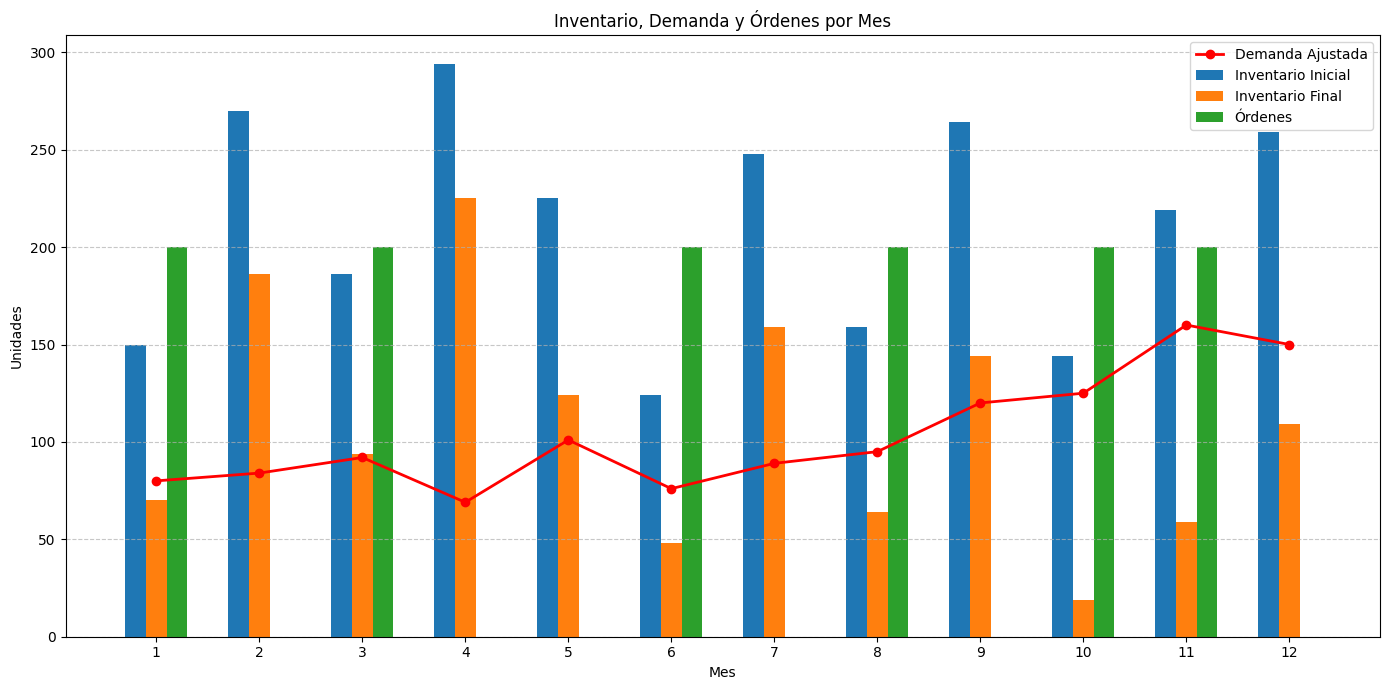

In [18]:
plt.figure(figsize=(14, 7))

# Barras para Inventario Inicial, Final y Órdenes
bar_width = 0.2
index = np.arange(len(meses))

plt.bar(index - bar_width, df['Inventario Inicial'], width=bar_width, label='Inventario Inicial')
plt.bar(index, df['Inventario Final'], width=bar_width, label='Inventario Final')
plt.bar(index + bar_width, df['Ordenes'], width=bar_width, label='Órdenes')

# Línea para la Demanda Ajustada
plt.plot(index, df['Demanda Ajustada'], label='Demanda Ajustada', color='red', marker='o', linewidth=2)

# Estética
plt.title('Inventario, Demanda y Órdenes por Mes')
plt.xlabel('Mes')
plt.ylabel('Unidades')
plt.xticks(index, df['Mes'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
# Método de la inversa
def Demanda(U): #Demanda del producto
  if 0 <= U < 0.01:
    return 35
  elif 0.01 <= U < 0.025:
    return 36
  elif 0.025 <= U < 0.045:
    return 37
  elif 0.045 <= U < 0.065:
    return 38
  elif 0.065 <= U < 0.087:
    return 39
  elif 0.087 <= U < 0.11:
    return 40
  elif 0.11 <= U < 0.135:
    return 41
  elif 0.135 <= U < 0.162:
    return 42
  elif 0.162 <= U < 0.190:
    return 43
  elif 0.190 <= U < 0.219:
    return 44
  elif 0.219 <= U < 0.254:
    return 45
  elif 0.254 <= U < 0.299:
    return 46
  elif 0.299 <= U < 0.359:
    return 47
  elif 0.359 <= U < 0.424:
    return 48
  elif 0.424 <= U < 0.494:
    return 49
  elif 0.494 <= U < 0.574:
    return 50
  elif 0.574 <= U < 0.649:
    return 51
  elif 0.649 <= U < 0.719:
    return 52
  elif 0.719 <= U < 0.784:
    return 53
  elif 0.784 <= U < 0.844:
    return 54
  elif 0.844 <= U < 0.894:
    return 55
  elif 0.894 <= U < 0.934:
    return 56
  elif 0.934 <= U < 0.964:
    return 57
  elif 0.964 <= U < 0.980:
    return 58
  elif 0.980 <= U < 0.995:
    return 59
  elif 0.995 <= U <= 1:
    return 60

In [28]:
# Generamos 100 valores aleatorios y calculamos sus demandas correspondientes
Uvalu = [random.random() for _ in range(1000)]
demandaVal = [Demanda(R) for R in Uvalu]

#Media

In [30]:
mediaDemanda = np.mean(demandaVal)
print(f'La media de la demanda es:{mediaDemanda}')

La media de la demanda es:48.982


#Acumulativa

In [37]:
#Calculamos la media acumulativa para realizar la grafica de convergencia
Acumumean = np.cumsum(demandaVal) / (np.arange(1, len(demandaVal) + 1))

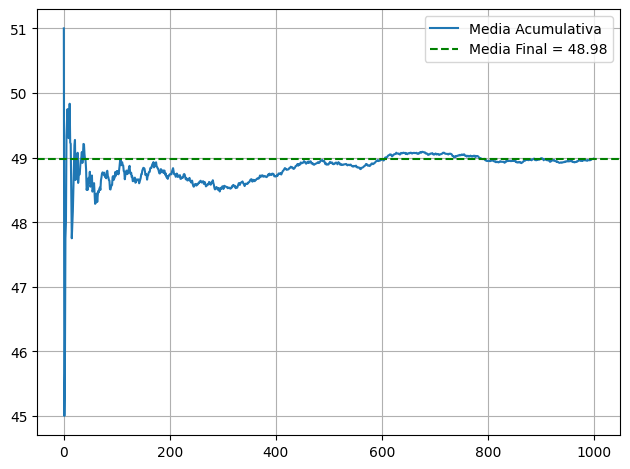

In [38]:
plt.plot(Acumumean, label='Media Acumulativa')
plt.axhline(y=mediaDemanda, color='green', linestyle= '--',label=f'Media Final = {mediaDemanda:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
# Costos
orden = 100
inventario = 20
faltante = 50

In [45]:
# Distribuciones empíricas
probdemanda = [0.01, 0.015, 0.02, 0.02, 0.022, 0.023, 0.025, 0.027, 0.028, 0.029, 0.035, 0.045, 0.065, 0.07, 0.075, 0.08]
valoresdemanda = [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
probentrega = [0.3, 0.4, 0.3]
valoresentrega = [1, 2, 3]
estacional = [1.2, 1.0, 0.9, 0.8, 0.8, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4]

In [46]:
# Normalizar la distribución de demanda
probdemanda = np.array(probdemanda)
probdemanda /= probdemanda.sum()

# Rango de búsqueda
rangos_q = range(100, 301, 50)
rangos_R = range(50, 201, 50)

costo_menor = float('inf')
mejor_q = None
mejor_R = None

#Simulación

In [59]:
for q in rangos_q:
    for r in rangos_R:
        stock = 150
        total_orden = 0
        total_inventario = 0
        total_faltante = 0

        for mes in range(12):
            ajuste = estacional[mes]
            demanda = np.random.choice(valoresdemanda, p=probdemanda) * ajuste

            if stock < demanda:
                falta = demanda - stock
                total_faltante += falta * faltante
                final = 0
            else:
                falta = 0
                final = stock - demanda

            if final <= r:
                entrega = np.random.choice(valoresentrega, p=probentrega)
                stock = final + q
                total_orden += orden

            total_inventario += final * inventario
            stock = final

        total = total_orden + total_inventario + total_faltante

        if total < costo_menor:
            costo_menor = total
            mejor_q = q
            mejor_R = r


In [60]:
print(f'Cantidad aordenar: {mejor_q}')
print(f'reorden: {mejor_R}')
print(f'Costo total mínimo: {costo_menor}')

Cantidad aordenar: 250
reorden: 50
Costo total mínimo: 21886.0
